### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Load the dataset

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dealing with data

In [3]:
# Focus on target
data['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [4]:
data['output'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

<AxesSubplot:xlabel='output', ylabel='count'>

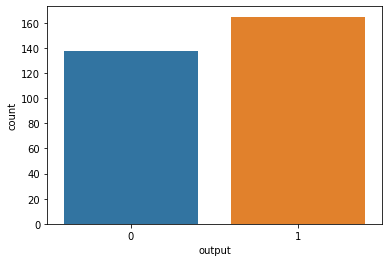

In [9]:
sns.countplot(x= 'output', data= data)

In [5]:
# Get some information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Summary statistics
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# The shape of the data
data.shape

(303, 14)

In [8]:
# Missing values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='sex', ylabel='count'>

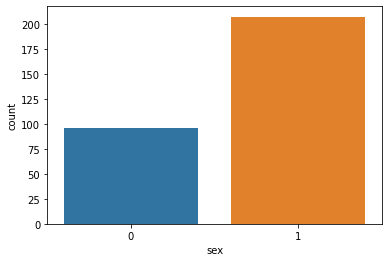

In [10]:
# Plotting some features
sns.countplot(x= 'sex', data= data)

<AxesSubplot:xlabel='chol', ylabel='age'>

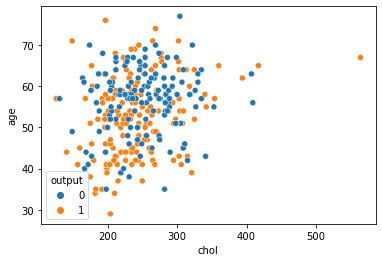

In [11]:
sns.scatterplot(x= 'chol', y= 'age', hue= 'output', data= data)

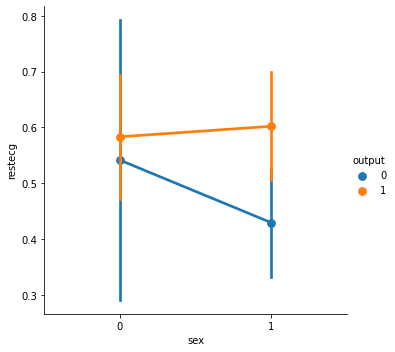

In [12]:
sns.catplot(x= 'sex', y= 'restecg', hue= 'output', data= data, kind= 'point')

<AxesSubplot:>

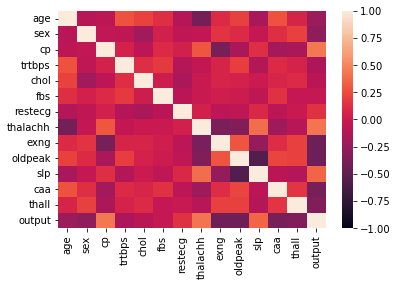

In [13]:
corr = data.corr()
sns.heatmap(corr, xticklabels= corr.columns, yticklabels= corr.columns, vmin=-1, vmax=1)

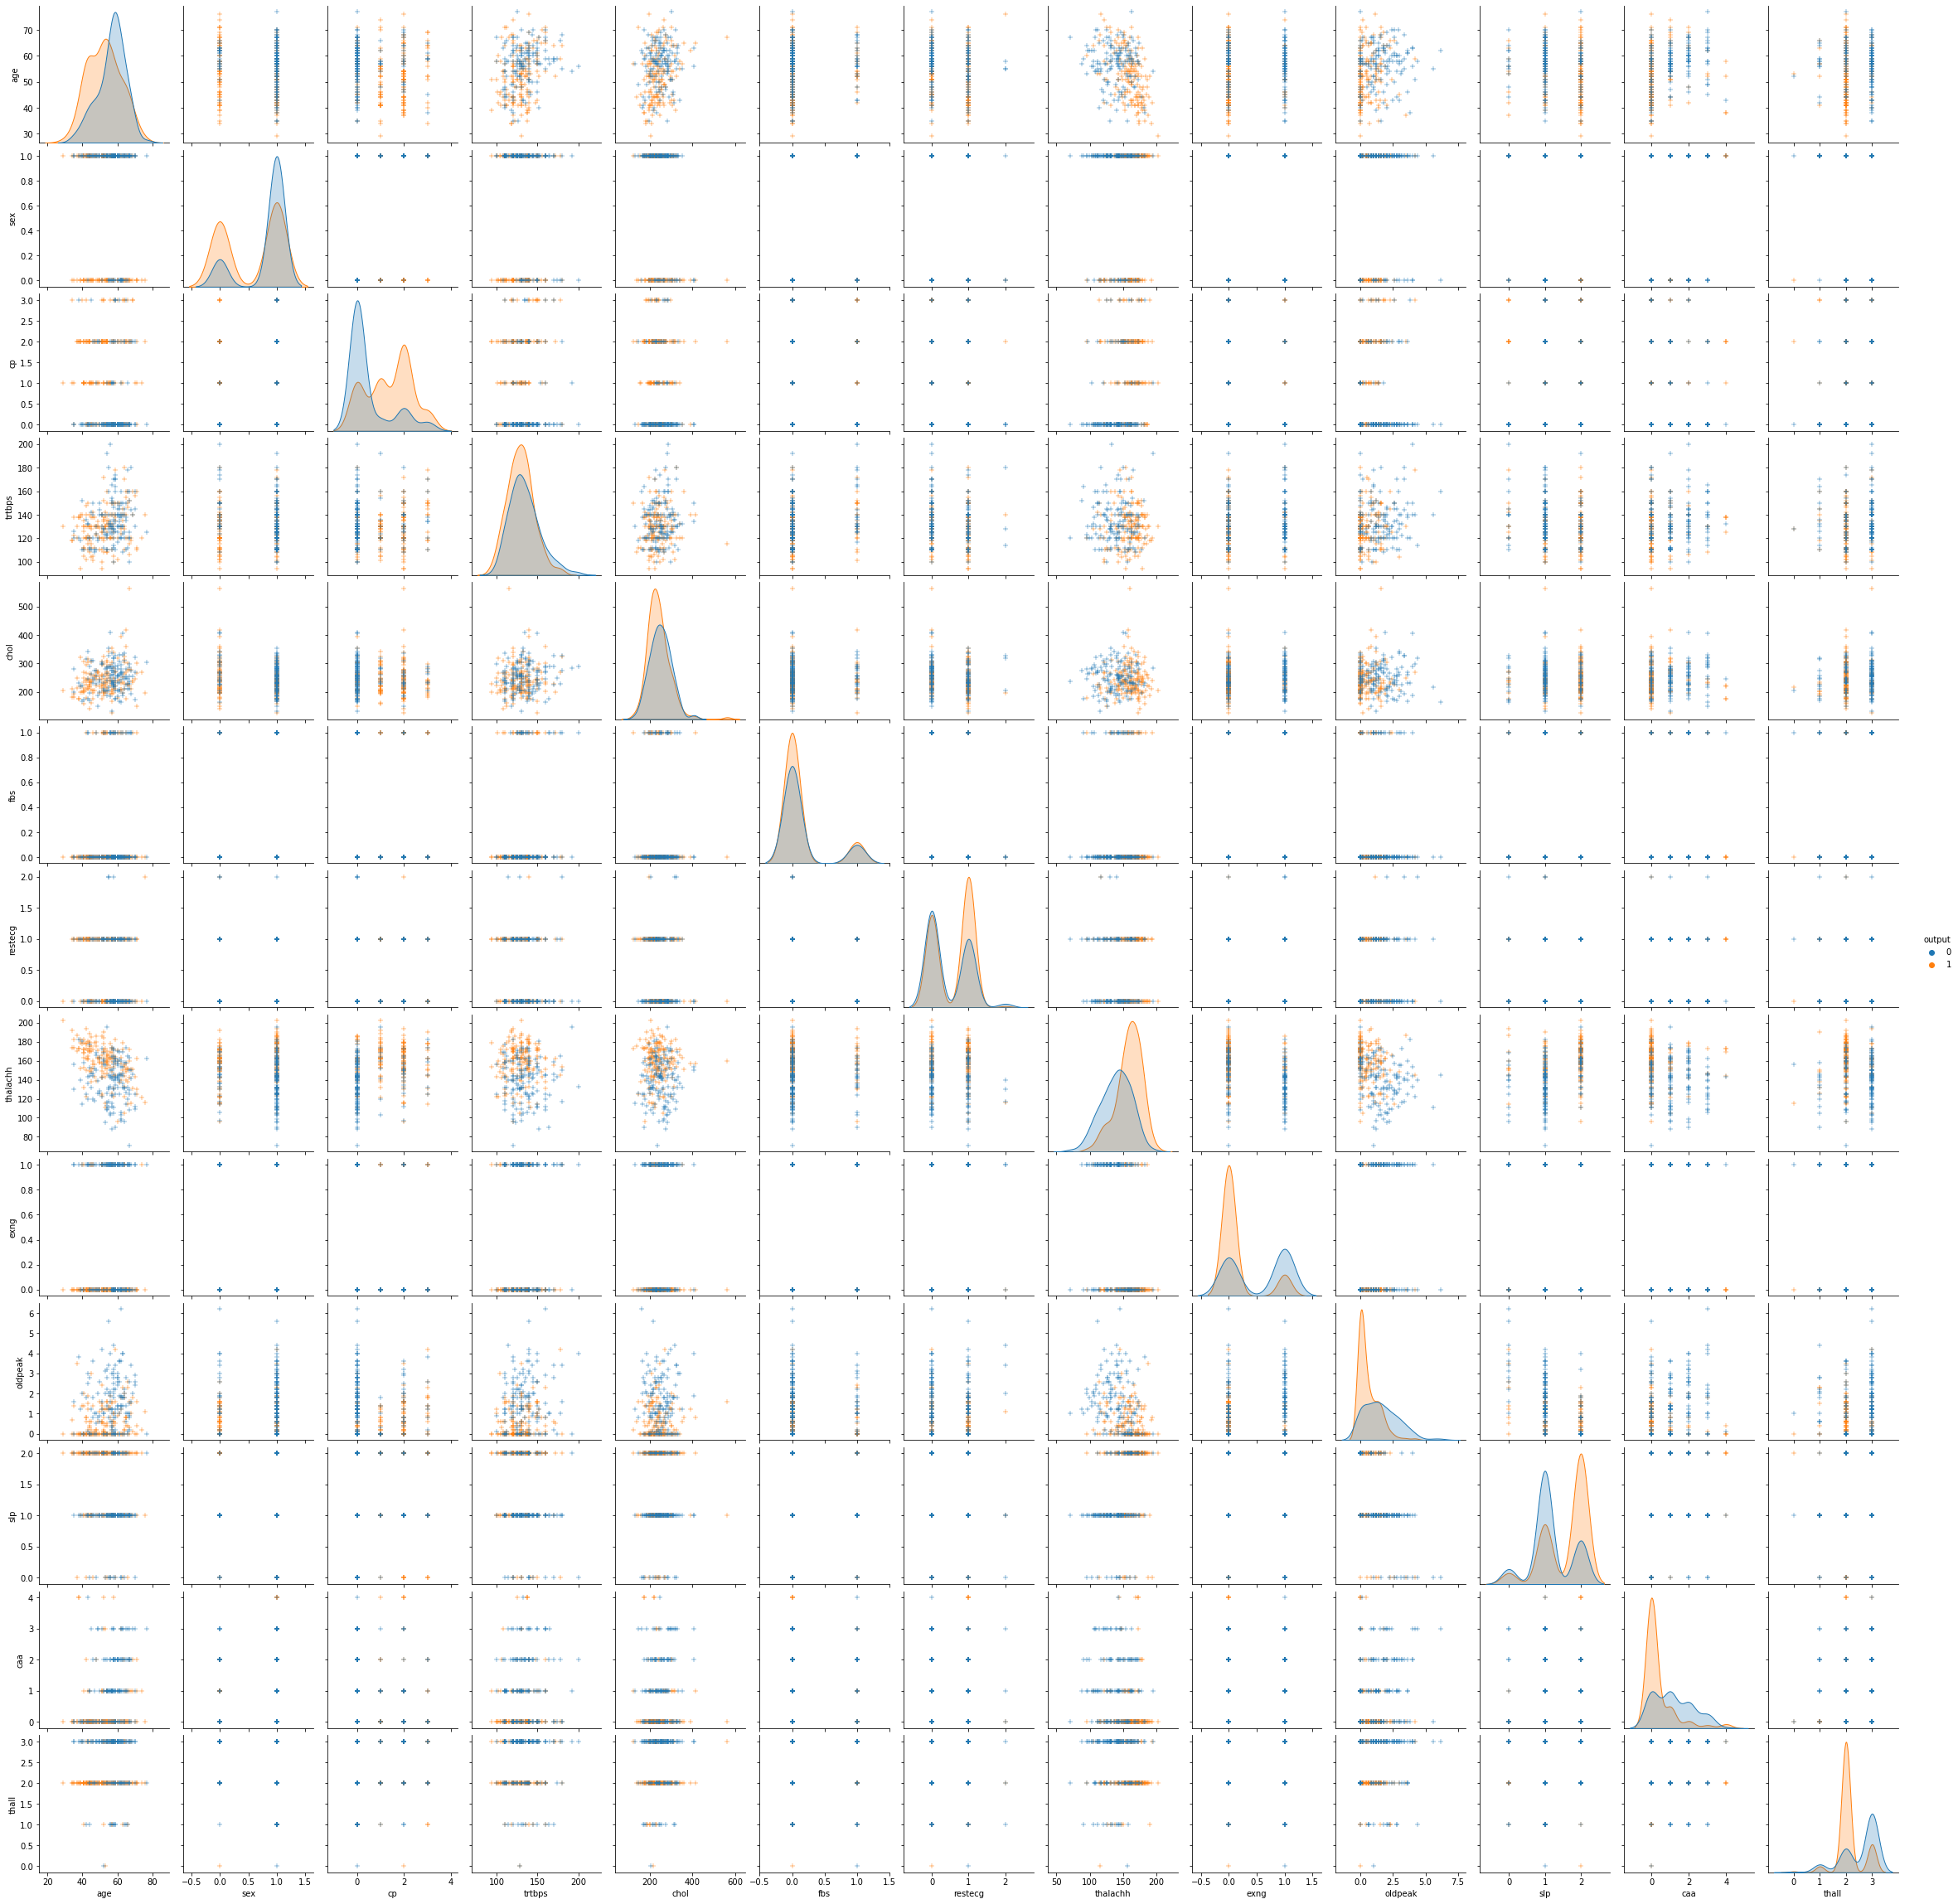

In [14]:
sns.pairplot(data, hue= 'output', markers= '+')
plt.show()

In [15]:
# correlation between some categorical columns
from scipy.stats import spearmanr
coef1,_ = spearmanr(data['restecg'], data['exng'])
coef1

-0.07739899630245445

In [16]:
coef2,_ = spearmanr(data['cp'], data['thall'])
coef2

-0.2078403180282728

### Data Preprocessing

In [17]:
# Separating the columns in categorical and continuous
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
con_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [18]:
data[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [19]:
data[cat_cols].head()

,sex,cp,fbs,restecg,exng,slp,caa,thall
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


### Packages 

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [21]:
# Making features model ready
df = data.copy()

In [22]:
scaler = StandardScaler()

In [23]:
# Scaling features
features = df[con_cols]
features = scaler.fit_transform(features.values)

df[con_cols] = features
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [24]:
# Encoding features
df = pd.get_dummies(df, columns= cat_cols, drop_first= True)
df.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [25]:
# Choosing features an target
x = df.drop(['output'], axis= 1)
y = df['output']

### Train and test split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

## Modeling

### SVM

In [27]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [29]:
pred_svc = svc.predict(x_test)

In [30]:
metrics.accuracy_score(y_test, pred_svc)

0.8791208791208791

In [31]:
print(confusion_matrix(y_test, pred_svc))

[[37  4]
 [ 7 43]]


In [32]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.91      0.86      0.89        50

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



In [33]:
# GridSearchCV for SVM
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit= True, verbose= 3)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.535 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.837 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.643 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.738 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.535 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.837 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.738 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.881 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.786 total time=   0.0s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [34]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [35]:
pred_grid_svc = grid.predict(x_test)

In [36]:
metrics.accuracy_score(y_test, pred_grid_svc)

0.8351648351648352

In [37]:
print(confusion_matrix(y_test, pred_grid_svc))

[[33  8]
 [ 7 43]]


In [38]:
print(classification_report(y_test, pred_grid_svc))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



### Decision tree

In [39]:
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
pred_dtc = dtc.predict(x_test)

In [42]:
metrics.accuracy_score(y_test, pred_dtc)

0.7362637362637363

In [43]:
# Randomized Search Cross Validation
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

params_dtc = {'max_depth': [None, 3],
              'max_features': randint(1,9),
              'min_samples_leaf': randint(1,9)}

In [44]:
tree_cv = RandomizedSearchCV(DecisionTreeClassifier(), params_dtc, cv= 5)

tree_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [None, 3],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f16a6915cc0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f16a735a350>})

In [45]:
print(tree_cv.best_params_)
print(tree_cv.best_score_)

{'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 4}
0.7643410852713178


In [47]:
tree_cv.score(x_test, y_test)

0.7802197802197802

### Random Forest

In [55]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
pred_rf = rf.predict(x_test)

In [57]:
metrics.accuracy_score(y_test, pred_rf)

0.8571428571428571

In [58]:
print(confusion_matrix(y_test, pred_rf))

print(classification_report(y_test, pred_rf))

[[36  5]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.89      0.84      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



### Logistic regression

In [48]:
log = LogisticRegression()

log.fit(x_train, y_train)

LogisticRegression()

In [49]:
pred_log = log.predict(x_test)

In [50]:
metrics.accuracy_score(y_test, pred_log)

0.8681318681318682

In [51]:
print(confusion_matrix(y_test, pred_log))

print(classification_report(y_test, pred_log))

[[35  6]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [52]:
# ROC Curve
y_pred_prob = log.predict_proba(x_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

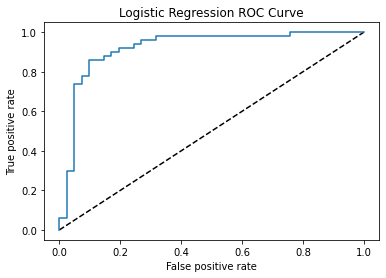

In [53]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [54]:
roc_auc_score(y_test, y_pred_prob)

0.92

### Gradient Boosting Classifier

In [59]:
gbt = GradientBoostingClassifier(n_estimators = 300 ,max_depth=1 ,subsample=0.8 ,max_features=0.2 ,random_state=42)

In [60]:
gbt.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=1, max_features=0.2, n_estimators=300,
                           random_state=42, subsample=0.8)

In [61]:
pred_gbt = gbt.predict(x_test)

In [62]:
metrics.accuracy_score(y_test, pred_gbt)

0.8461538461538461

In [63]:
print(confusion_matrix(y_test, pred_gbt))

print(classification_report(y_test, pred_gbt))

[[34  7]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



### KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors= 6, metric= 'minkowski', p=2)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [65]:
pred_knn = knn.predict(x_test)

In [66]:
metrics.accuracy_score(y_test, pred_knn)

0.7692307692307693

In [67]:
# GridSearchCV for KNN
param_grid_knn = {'n_neighbors': np.arange(1,50), 'metric': ['minkowski', 'manhattan']}

knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid_knn, verbose= 3, cv= 5)

knn_cv.fit(x_train, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV 1/5] END ...metric=minkowski, n_neighbors=1;, score=0.814 total time=   0.0s
[CV 2/5] END ...metric=minkowski, n_neighbors=1;, score=0.791 total time=   0.0s
[CV 3/5] END ...metric=minkowski, n_neighbors=1;, score=0.595 total time=   0.0s
[CV 4/5] END ...metric=minkowski, n_neighbors=1;, score=0.857 total time=   0.0s
[CV 5/5] END ...metric=minkowski, n_neighbors=1;, score=0.786 total time=   0.0s
[CV 1/5] END ...metric=minkowski, n_neighbors=2;, score=0.744 total time=   0.0s
[CV 2/5] END ...metric=minkowski, n_neighbors=2;, score=0.791 total time=   0.0s
[CV 3/5] END ...metric=minkowski, n_neighbors=2;, score=0.762 total time=   0.0s
[CV 4/5] END ...metric=minkowski, n_neighbors=2;, score=0.857 total time=   0.0s
[CV 5/5] END ...metric=minkowski, n_neighbors=2;, score=0.714 total time=   0.0s
[CV 1/5] END ...metric=minkowski, n_neighbors=3;, score=0.791 total time=   0.0s
[CV 2/5] END ...metric=minkowski, n_neighbors=3

[CV 3/5] END ..metric=minkowski, n_neighbors=23;, score=0.667 total time=   0.0s
[CV 4/5] END ..metric=minkowski, n_neighbors=23;, score=0.857 total time=   0.0s
[CV 5/5] END ..metric=minkowski, n_neighbors=23;, score=0.738 total time=   0.0s
[CV 1/5] END ..metric=minkowski, n_neighbors=24;, score=0.884 total time=   0.0s
[CV 2/5] END ..metric=minkowski, n_neighbors=24;, score=0.791 total time=   0.0s
[CV 3/5] END ..metric=minkowski, n_neighbors=24;, score=0.667 total time=   0.0s
[CV 4/5] END ..metric=minkowski, n_neighbors=24;, score=0.857 total time=   0.0s
[CV 5/5] END ..metric=minkowski, n_neighbors=24;, score=0.714 total time=   0.0s
[CV 1/5] END ..metric=minkowski, n_neighbors=25;, score=0.860 total time=   0.0s
[CV 2/5] END ..metric=minkowski, n_neighbors=25;, score=0.791 total time=   0.0s
[CV 3/5] END ..metric=minkowski, n_neighbors=25;, score=0.667 total time=   0.0s
[CV 4/5] END ..metric=minkowski, n_neighbors=25;, score=0.786 total time=   0.0s
[CV 5/5] END ..metric=minkow

[CV 3/5] END ..metric=minkowski, n_neighbors=44;, score=0.619 total time=   0.0s
[CV 4/5] END ..metric=minkowski, n_neighbors=44;, score=0.786 total time=   0.0s
[CV 5/5] END ..metric=minkowski, n_neighbors=44;, score=0.738 total time=   0.0s
[CV 1/5] END ..metric=minkowski, n_neighbors=45;, score=0.884 total time=   0.0s
[CV 2/5] END ..metric=minkowski, n_neighbors=45;, score=0.860 total time=   0.0s
[CV 3/5] END ..metric=minkowski, n_neighbors=45;, score=0.643 total time=   0.0s
[CV 4/5] END ..metric=minkowski, n_neighbors=45;, score=0.786 total time=   0.0s
[CV 5/5] END ..metric=minkowski, n_neighbors=45;, score=0.738 total time=   0.0s
[CV 1/5] END ..metric=minkowski, n_neighbors=46;, score=0.884 total time=   0.0s
[CV 2/5] END ..metric=minkowski, n_neighbors=46;, score=0.860 total time=   0.0s
[CV 3/5] END ..metric=minkowski, n_neighbors=46;, score=0.619 total time=   0.0s
[CV 4/5] END ..metric=minkowski, n_neighbors=46;, score=0.786 total time=   0.0s
[CV 5/5] END ..metric=minkow

[CV 3/5] END ..metric=manhattan, n_neighbors=18;, score=0.738 total time=   0.0s
[CV 4/5] END ..metric=manhattan, n_neighbors=18;, score=0.881 total time=   0.0s
[CV 5/5] END ..metric=manhattan, n_neighbors=18;, score=0.762 total time=   0.0s
[CV 1/5] END ..metric=manhattan, n_neighbors=19;, score=0.884 total time=   0.0s
[CV 2/5] END ..metric=manhattan, n_neighbors=19;, score=0.814 total time=   0.0s
[CV 3/5] END ..metric=manhattan, n_neighbors=19;, score=0.714 total time=   0.0s
[CV 4/5] END ..metric=manhattan, n_neighbors=19;, score=0.857 total time=   0.0s
[CV 5/5] END ..metric=manhattan, n_neighbors=19;, score=0.786 total time=   0.0s
[CV 1/5] END ..metric=manhattan, n_neighbors=20;, score=0.884 total time=   0.0s
[CV 2/5] END ..metric=manhattan, n_neighbors=20;, score=0.814 total time=   0.0s
[CV 3/5] END ..metric=manhattan, n_neighbors=20;, score=0.714 total time=   0.0s
[CV 4/5] END ..metric=manhattan, n_neighbors=20;, score=0.857 total time=   0.0s
[CV 5/5] END ..metric=manhat

[CV 1/5] END ..metric=manhattan, n_neighbors=40;, score=0.907 total time=   0.0s
[CV 2/5] END ..metric=manhattan, n_neighbors=40;, score=0.837 total time=   0.0s
[CV 3/5] END ..metric=manhattan, n_neighbors=40;, score=0.667 total time=   0.0s
[CV 4/5] END ..metric=manhattan, n_neighbors=40;, score=0.857 total time=   0.0s
[CV 5/5] END ..metric=manhattan, n_neighbors=40;, score=0.762 total time=   0.0s
[CV 1/5] END ..metric=manhattan, n_neighbors=41;, score=0.907 total time=   0.0s
[CV 2/5] END ..metric=manhattan, n_neighbors=41;, score=0.837 total time=   0.0s
[CV 3/5] END ..metric=manhattan, n_neighbors=41;, score=0.667 total time=   0.0s
[CV 4/5] END ..metric=manhattan, n_neighbors=41;, score=0.833 total time=   0.0s
[CV 5/5] END ..metric=manhattan, n_neighbors=41;, score=0.762 total time=   0.0s
[CV 1/5] END ..metric=manhattan, n_neighbors=42;, score=0.907 total time=   0.0s
[CV 2/5] END ..metric=manhattan, n_neighbors=42;, score=0.814 total time=   0.0s
[CV 3/5] END ..metric=manhat

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             verbose=3)

In [68]:
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 4}

In [69]:
knn_cv.best_score_

0.8301218161683279

### Naive bayes

In [70]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

GaussianNB()

In [71]:
pred_gnb = gnb.predict(x_test)

In [72]:
metrics.accuracy_score(y_test, pred_gnb)

0.8021978021978022

In [73]:
print(confusion_matrix(y_test, pred_gnb))

print(classification_report(y_test, pred_gnb))

[[34  7]
 [11 39]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        41
           1       0.85      0.78      0.81        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91

